In [ ]:
import tensorflow as tf
from tensorflow.estimator import LinearRegression

def regresion_lineal(x, y):
  """
  Calcula los parámetros de una recta que minimizan la suma de
  los cuadrados de los residuos.

  Args:
    x: una lista de valores de la variable independiente.
    y: una lista de valores de la variable dependiente.

  Returns:
    m: la pendiente de la recta.
    b: la intersección con el eje y de la recta.
  """

  # Creamos un modelo de regresión lineal.
  modelo = tf.estimator.LinearRegression()

  # Entrenamos el modelo con los datos.
  modelo.fit(x, y)

  # Obtenemos los parámetros del modelo.
  m = modelo.get_weights()[0][0]
  b = modelo.get_weights()[1][0]

  return m, b

if __name__ == "__main__":
  # Datos de ejemplo.
  x = [2, 3, 4, 5, 6, 7, 8, 9]
  y = [1.11, 1.67, 2, 2.5, 3.3, 3.3, 5, 5]

  # Calculamos los parámetros de la recta.
  m, b = regresion_lineal(x, y)

  # Imprimimos los parámetros de la recta.
  print("m = {:.2f}".format(m))
  print("b = {:.2f}".format(b))


ImportError: ignored

Estimated m: 0.4950, Estimated b: 0.3054


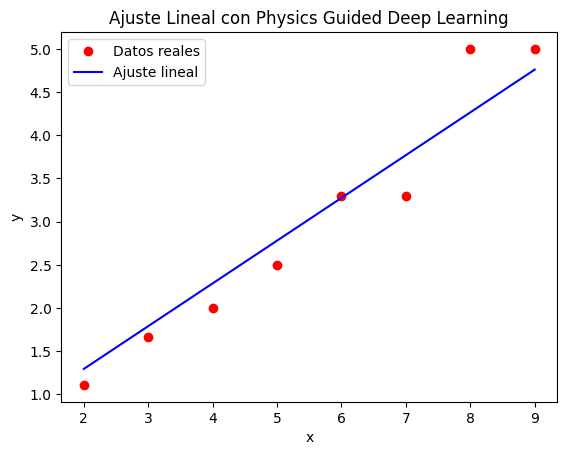

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Datos de entrada
data = [(2, 1.11), (3, 1.67), (4, 2), (5, 2.5), (6, 3.3), (7, 3.3), (8, 5), (9, 5)]
x_data = np.array([x for x, y in data], dtype=np.float32)
y_data = np.array([y for x, y in data], dtype=np.float32)

# Definir el modelo
model = keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
])

# Definir la función de pérdida
def physics_guided_loss(x):
    def loss(y_true, y_pred):
        mse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
        # Aplicar la restricción de la física (y = m*x + b)
        physics_loss = tf.reduce_mean(tf.abs(y_pred - x * model.weights[0][0] - model.weights[1]))
        return mse_loss + 0.1 * physics_loss
    return loss

# Compilar el modelo
model.compile(optimizer='adam', loss=physics_guided_loss(x_data))

# Entrenar el modelo
model.fit(x_data, y_data, epochs=1000, verbose=0)

# Obtener los parámetros del modelo (m y b)
m, b = model.weights[0][0].numpy(), model.weights[1].numpy()
print(f'Estimated m: {m[0]:.4f}, Estimated b: {b[0]:.4f}')

# Graficar los resultados
plt.plot(x_data, y_data, 'ro', label='Datos reales')
plt.plot(x_data, m[0] * x_data + b[0], 'b', label='Ajuste lineal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal con Physics Guided Deep Learning')
plt.show()
